<a href="https://colab.research.google.com/github/ManishBolbanda-dev/colab-notebooks/blob/main/gans_demo_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import files

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Flatten, Reshape
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [3]:
img_rows =28
img_cols =28
channels =1

In [4]:
image_shape = (img_rows,img_cols,channels)

In [15]:
#Given input of noise (latent) vector, the Generator produces an image.
def build_generator():
  noise_shape = (100,) #1D array of size 100
  model = Sequential()

  model.add(Dense(256,input_shape=noise_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(1024))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod(image_shape), activation='tanh'))
  model.add(Reshape(image_shape))

  model.summary()

  noise = Input(shape=noise_shape)
  img = model(noise)  ## Generated Images

  return Model(noise,img)


In [6]:
def build_descriminator():

  model = Sequential()

  model.add(Flatten(input_shape=image_shape))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(1,activation='sigmoid'))
  model.summary()

  img = Input(shape=image_shape)
  validity = model(img)

  return Model(img,validity)

In [22]:
#Now that we have constructed our two models it’s time to pit them against each other.
#We do this by defining a training function, loading the data set, re-scaling our training
#images and setting the ground truths

def train(epochs,batch_size=128,save_interval):
  (x_train,_),(_,_) = mnist.load_data()
  #convert to float and rescale
  x_train = (x_train.astype(np.float32) - 127.5)/127.5
  x_train = np.expand_dims(x_train, axis=3)
  half_batch = int(batch_size/2)

  #We then loop through a number of epochs to train our Discriminator by first selecting
  #a random batch of images from our true dataset, generating a set of images from our
  #Generator, feeding both set of images into our Discriminator, and finally setting the
  #loss parameters for both the real and fake images, as well as the combined loss. 

  for epoch in range(epochs):
    idx = np.random.randint(0,x_train.shape[0],half_batch)
    imgs = x_train[idx]

    noise = np.random.normal(0,1,(half_batch,100))

    gen_image = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(imgs,np.ones((half_batch,1)))
    d_loss_fake = discriminator.train_on_batch(gen_image,np.zeros((half_batch,1)))

    d_loss = 0.5*np.add(d_loss_real,d_loss_fake)

    noise = np.random.normal(0,1, (batch_size,100))
     # The generator wants the discriminator to label the generated samples
        # as valid (ones)
        #This is where the genrator is trying to trick discriminator into believing
        #the generated image is true (hence value of 1 for y)

    valid_y = np.array([1]*batch_size)

    g_loss = combined.train_on_batch(noise,valid_y)

    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

    if epoch % save_interval ==0:
      save_imges(epoch)

    #when the specific sample_interval is hit, we call the
    #sample_image function. Which looks as follows.
    

In [42]:
def save_imges(epoch):
  r,c = 5,5
  noise = np.random.normal(0,1,(r*c, 100))
  gen_imgs = generator.predict(noise)
  gen_imgs = 0.5*gen_imgs+0.5
  fig,axs = plt.subplots(r,c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i,j].imshow(gen_imgs[cnt, : ,:,0], cmap='gray')
      axs[i,j].axis('off')
      cnt +=1
  print('saving images start')
  fig.savefig("mnist_%d.png" % epoch)
  print('saving image end')
  plt.close()

In [12]:
optimizer = Adam(0.0002,0.5)  # learning rate momentum

# Build and compile the discriminator first. 
#Generator will be trained as part of the combined model, later. 
#pick the loss function and the type of metric to keep track.                 
#Binary cross entropy as we are doing prediction and it is a better
#loss function compared to MSE or other.



In [13]:
discriminator = build_descriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer,
                      metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
__________________________________________________

In [16]:
generator = build_generator()
generator.compile(loss='binary_crossentropy',optimizer = optimizer)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_8 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_9 (Dense)              (None, 1024)             

In [17]:
z= Input(shape=(100,))
img = generator(z)

In [18]:
discriminator.trainable = False


In [19]:
valid = discriminator(img)  #Validity check on the generated image

In [20]:
combined = Model(z,valid)
combined.compile(loss='binary_crossentropy', optimizer = optimizer)


In [44]:
train(epochs=5000,batch_size=32, save_interval=100)

Streaming output truncated to the last 5000 lines.
98 [D loss: 0.690710, acc.: 46.88%] [G loss: 0.801778]
99 [D loss: 0.740788, acc.: 37.50%] [G loss: 0.744090]
100 [D loss: 0.732108, acc.: 40.62%] [G loss: 0.746895]
saving images start
saving image end
101 [D loss: 0.733643, acc.: 40.62%] [G loss: 0.738961]
102 [D loss: 0.692579, acc.: 59.38%] [G loss: 0.723952]
103 [D loss: 0.648017, acc.: 53.12%] [G loss: 0.790547]
104 [D loss: 0.698336, acc.: 53.12%] [G loss: 0.715503]
105 [D loss: 0.725827, acc.: 43.75%] [G loss: 0.713178]
106 [D loss: 0.678575, acc.: 53.12%] [G loss: 0.759894]
107 [D loss: 0.669916, acc.: 46.88%] [G loss: 0.760967]
108 [D loss: 0.709762, acc.: 46.88%] [G loss: 0.757344]
109 [D loss: 0.661283, acc.: 56.25%] [G loss: 0.777676]
110 [D loss: 0.679402, acc.: 46.88%] [G loss: 0.810031]
111 [D loss: 0.756097, acc.: 43.75%] [G loss: 0.709469]
112 [D loss: 0.725232, acc.: 37.50%] [G loss: 0.659548]
113 [D loss: 0.660685, acc.: 46.88%] [G loss: 0.727589]
114 [D loss: 0.758

# New Section

# New Section

In [45]:
generator.save('mninst_generator_model.h5')

In [46]:
from keras.models import load_model

In [47]:
loaded_model = load_model('/content/mninst_generator_model.h5')

In [62]:
vector = np.random.randn(100)
vector = vector.reshape(1,100)

In [65]:
x = loaded_model.predict(vector)


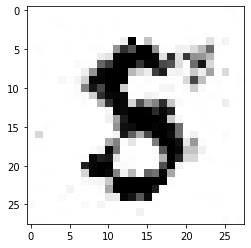

In [66]:
plt.imshow(x[0,:,:,0],cmap='gray_r')
plt.show()